[The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

(150, 4)
(150, 3)


/var/folders/v0/9q6t7l7127545x7_l50d2yvdc16wv8/T/ipykernel_33553/1865750391.py:57: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
/var/folders/v0/9q6t7l7127545x7_l50d2yvdc16wv8/T/ipykernel_33553/1865750391.py:59: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
/var/folders/v0/9q6t7l7127545x7_l50d2yvdc16wv8/T/ipykernel_33553/1865750391.py:61: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


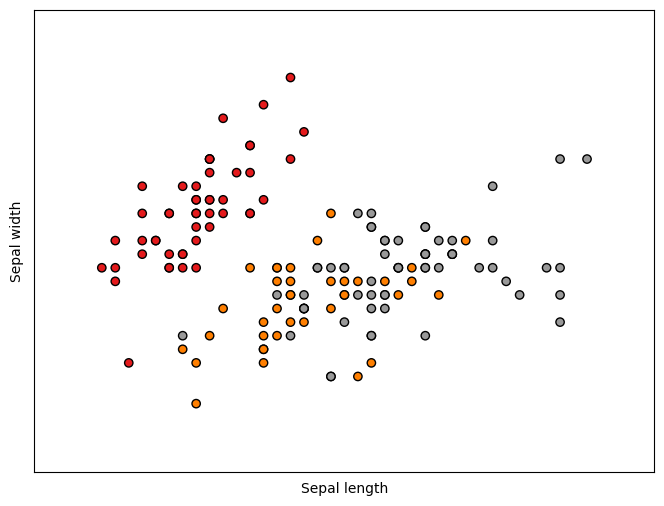

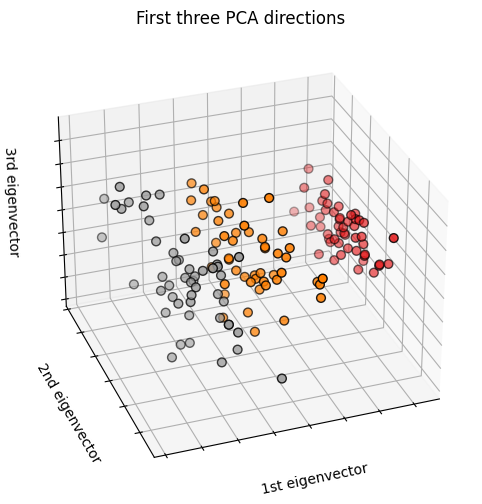

In [2]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

print(iris.data.shape)

X_reduced = PCA(n_components=3).fit_transform(iris.data)

print(X_reduced.shape)

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

---

# PCA from scratch

<img src="./pca/PCA.JPEG" align="left"/>

In [2]:
import os
import sys
sys.path.append(f"{os.getcwd()}/pca")

In [3]:
from pca.main import PCA as MY_PCA

In [4]:
def run():
    n_components: int = 3
    plt.figure(2, figsize=(8, 6))
    plt.clf()

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

    # To getter a better understanding of interaction of the dimensions
    # plot the first three PCA dimensions
    fig = plt.figure(1, figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

    pca = MY_PCA()
    X_reduced = pca.fit(X=iris.data, threshold=1.0)[
        :,
        0:n_components
    ]

    from sklearn.decomposition import PCA
    s_reduced = PCA(n_components=n_components).fit_transform(iris.data)
    assert np.allclose(a=np.abs(s_reduced), b=np.abs(X_reduced), atol=1e-05), \
        f"invalid PCA result. expected:\n {s_reduced[0:10, :]}\nactual:\n{X_reduced[0:10, :]}"

    ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        X_reduced[:, 2],
        c=y,
        cmap=plt.cm.Set1,
        edgecolor="k",
        s=40,
    )

    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

    plt.show()

    assert True

/var/folders/v0/9q6t7l7127545x7_l50d2yvdc16wv8/T/ipykernel_33608/733434671.py:44: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
/var/folders/v0/9q6t7l7127545x7_l50d2yvdc16wv8/T/ipykernel_33608/733434671.py:46: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
/var/folders/v0/9q6t7l7127545x7_l50d2yvdc16wv8/T/ipykernel_33608/733434671.py:48: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


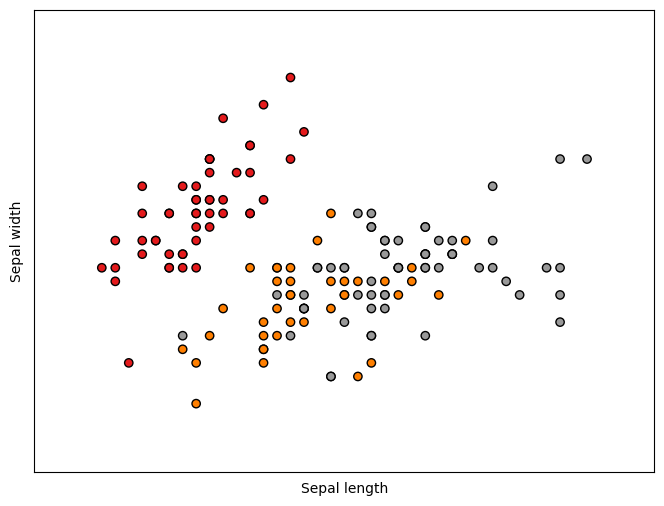

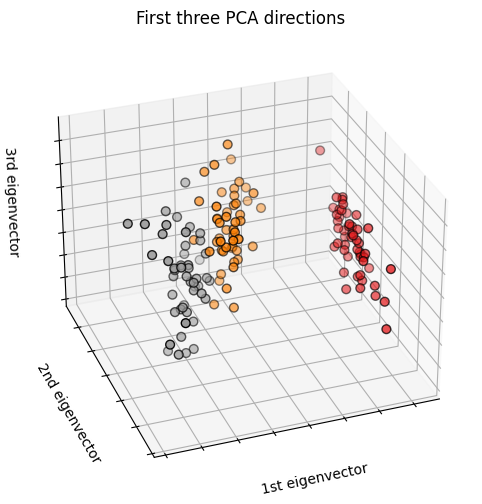

In [5]:
run()